<a href="https://colab.research.google.com/github/jihankaruniaa/PCVK_Ganjil_2024/blob/main/Modul_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 6 - Histogram, Histogram Equalization, Dithering

## Tugas Praktikum

1. Import folder drive

In [2]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import Library

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart

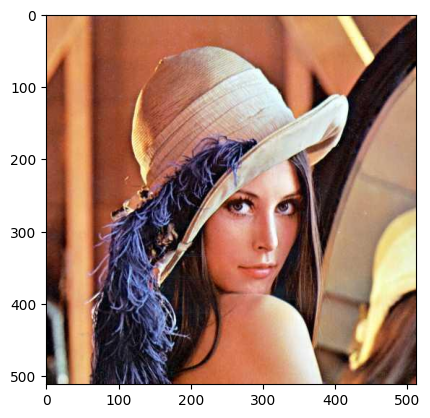

In [4]:
# Input Image
img = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/lena.jpg')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [5]:
# Menghitung jumlah kemunculan setiap pixel warna pada seluruh pixel citra yang ada

height, width, depth = np.shape(img)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

<BarContainer object of 256 artists>

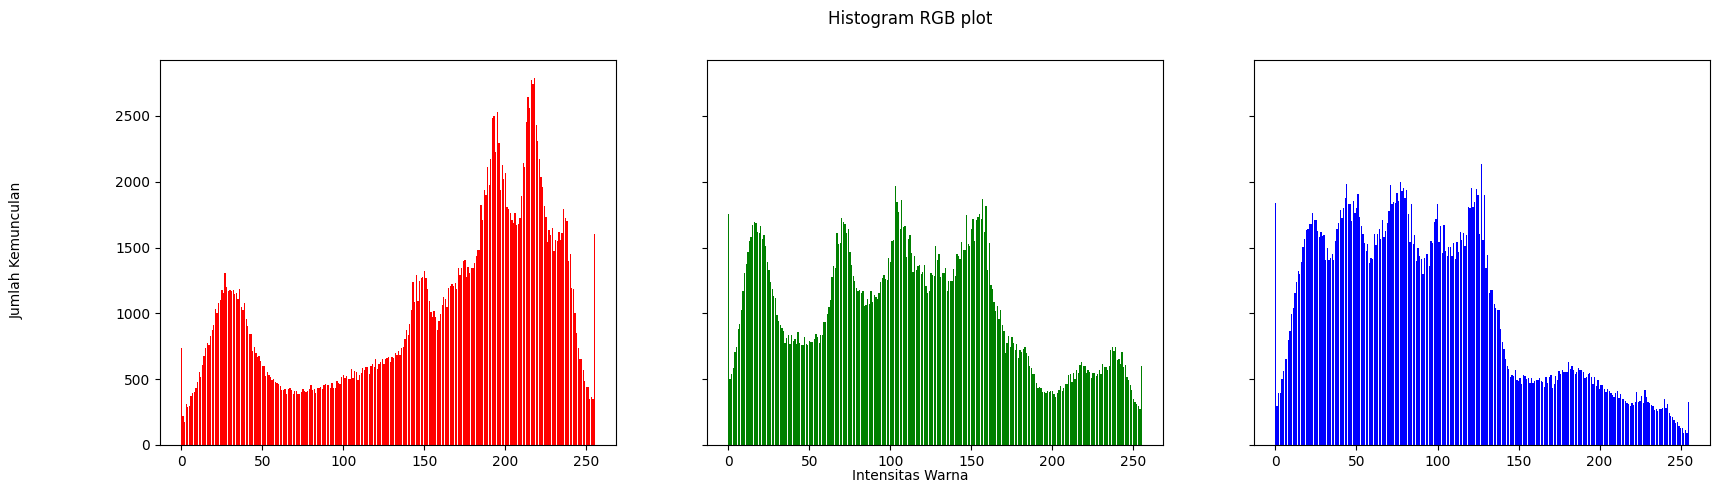

In [6]:
# Membuat histogram citra
names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

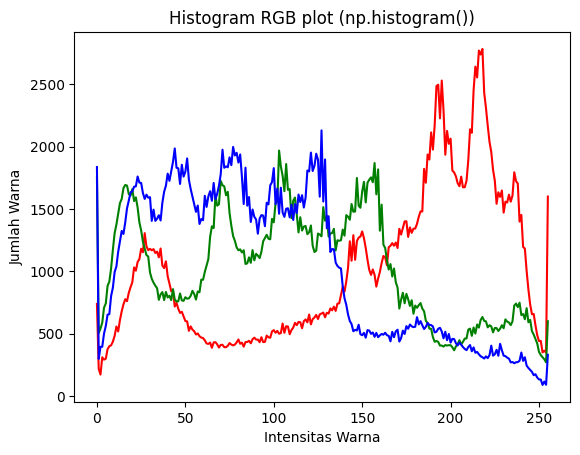

In [7]:
# Split image into RGB channels
r, g, b = cv.split(img_rgb)

# np.histogram() adalah fungsi NumPy yang digunakan untuk menghitung histogram dari data.

# Calculate histograms for each channel using NumPy
r_hist = np.histogram(r.ravel(), 256, [0, 256])
g_hist = np.histogram(g.ravel(), 256, [0, 256])
b_hist = np.histogram(b.ravel(), 256, [0, 256])

# Plot histograms for each channel
plt.plot(r_hist[1][:-1], r_hist[0], color='red')
plt.plot(g_hist[1][:-1], g_hist[0], color='green')
plt.plot(b_hist[1][:-1], b_hist[0], color='blue')

# Set plot title and axis labels
plt.title('Histogram RGB plot (np.histogram())')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Warna')

# Show the plot
plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)


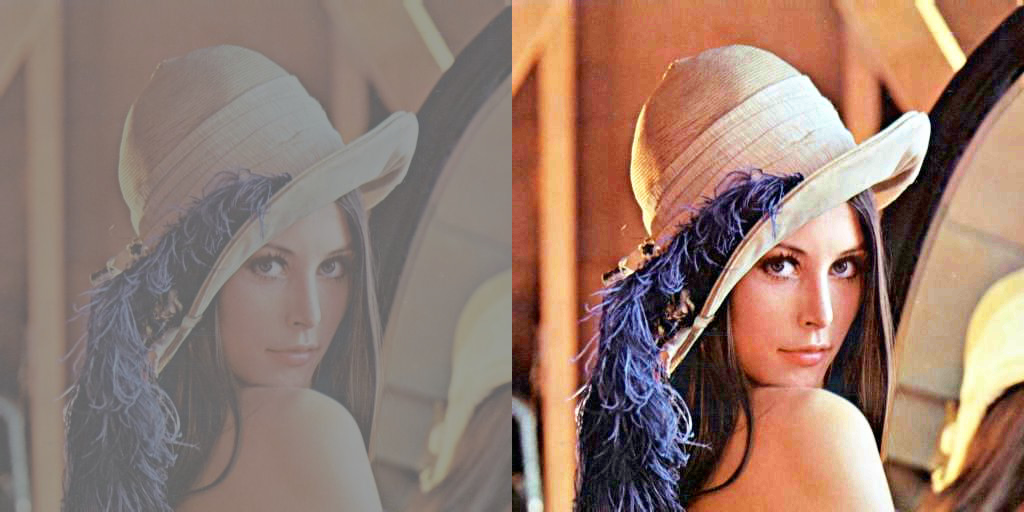

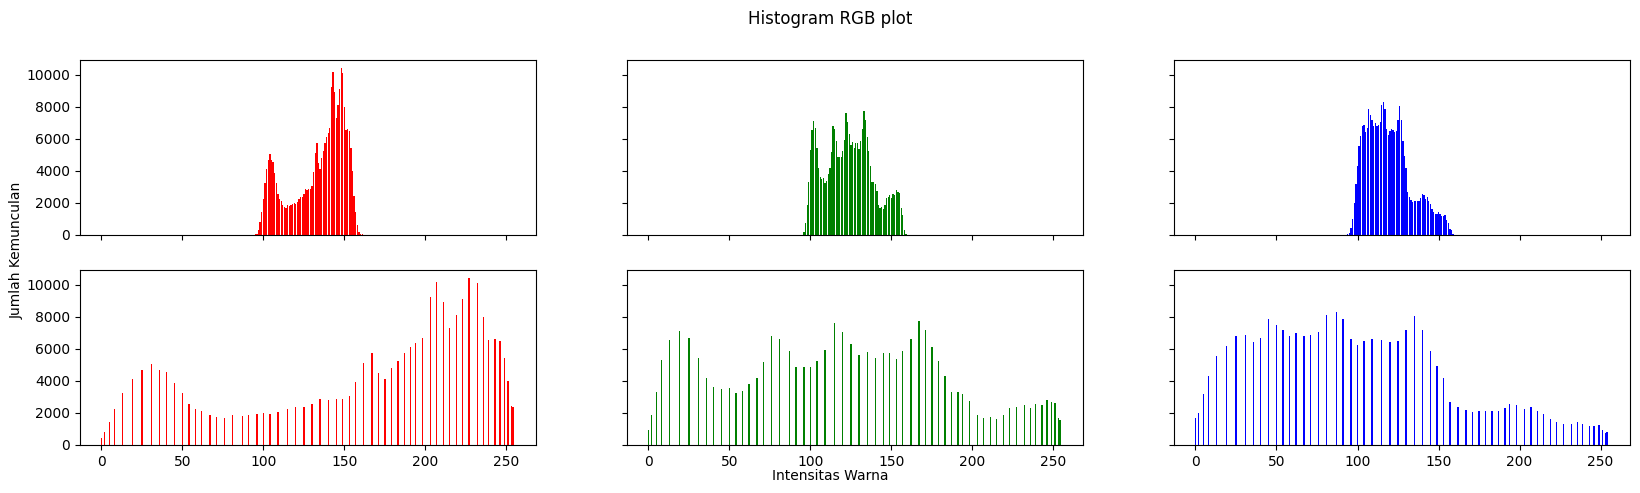

In [8]:
# Input Image
img1 = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/lena_lc.jpg')

# Menghitung jumlah kemunculan setiap pixel warna pada nilai tertentu (Frekuensi)
def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img1[y][x][0]] += 1
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1
  return ax

histo_asli = histog(img1)

#convert to Numpy array
img_array = np.asarray(img1)

#Normalized cumulative histogram
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

#Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Transformation
# flatten image array into 10 list
img_list = list(img_array.flatten())

# Implementasi rumus K0
eq_img_list = [transform_map[p] for p in img_list]

eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

# Transformasi kembali dalam bentuk citra
final_frame = cv.hconcat((img1, img2))
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig. suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

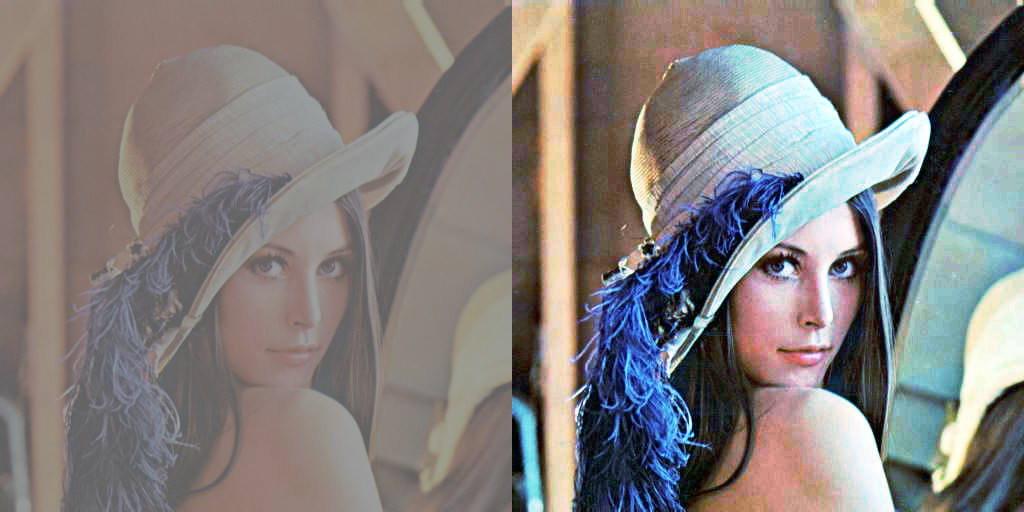

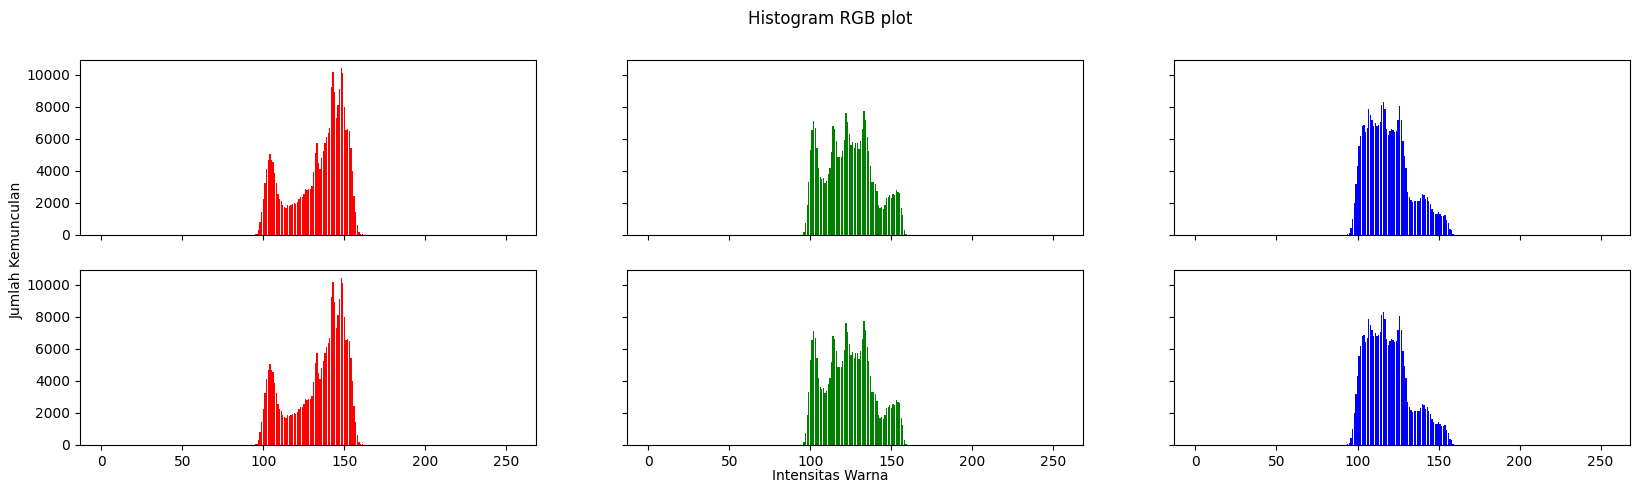

In [9]:
channels = cv.split(img1)
eq_channels = []
for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img1, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, histo_asli[2], color='red')
  axs[1,1].bar(names, histo_asli[1], color='green')
  axs[1,2].bar(names, histo_asli[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)

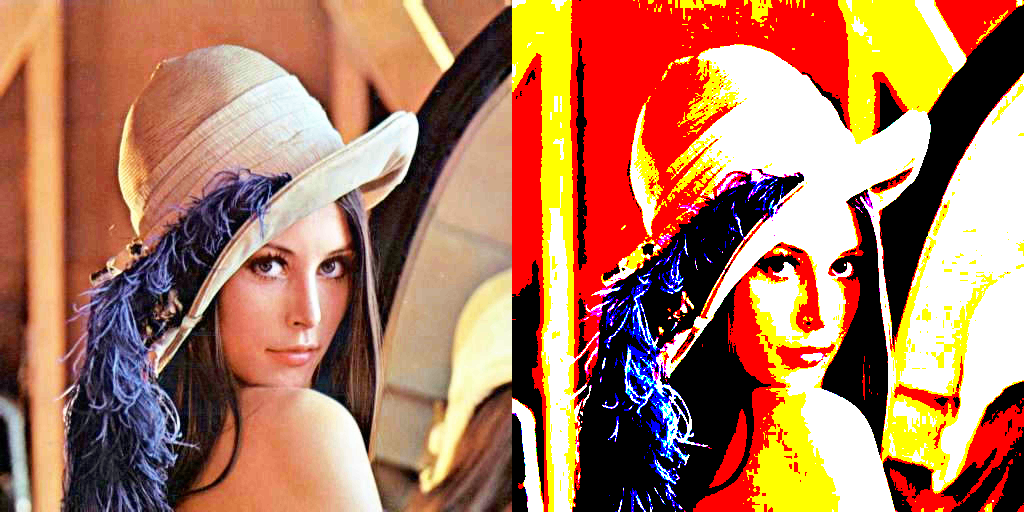

True

In [10]:
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/lena7.jpg', img_8)

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

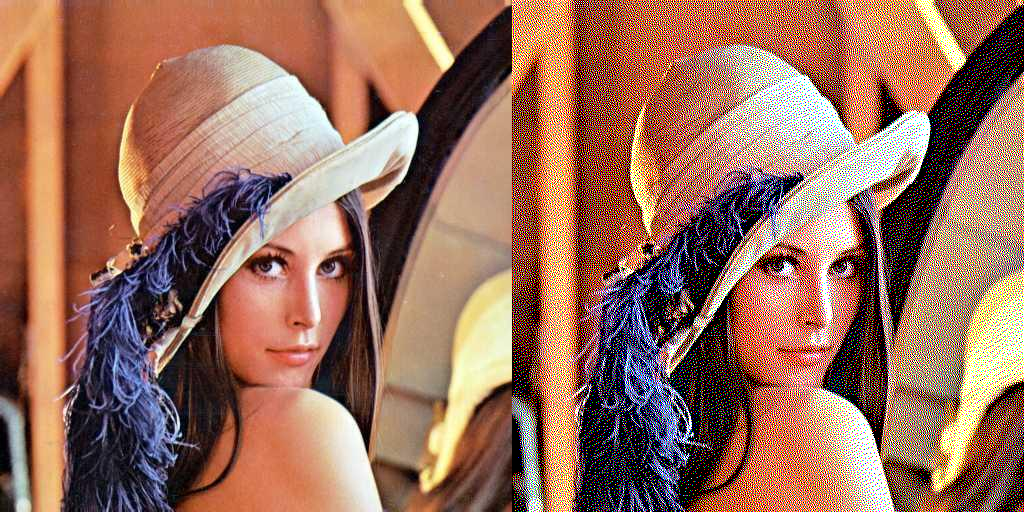

In [11]:
from PIL import Image
# Membuka gambar asli tanpa konversi grayscale
imageConvert = Image.open('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/lena.jpg')
imageConvert = imageConvert.convert(mode='RGB')

# Simpan gambar asli untuk dibandingkan nanti
imageConvert.save('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/lena.jpg')

# Membaca gambar menggunakan OpenCV
img = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/lena.jpg')

# Mendapatkan dimensi gambar
Height, Width, _ = img.shape

# Floyd-Steinberg dithering untuk gambar berwarna (RGB)
for y in range(0, Height):
    for x in range(0, Width):
        for c in range(3):  # Lakukan proses pada setiap channel warna (R, G, B)
            old_value = img[y, x, c]
            new_value = 0
            if old_value > 128:
                new_value = 255

            img[y, x, c] = new_value
            error = old_value - new_value

            # Sebarkan kesalahan ke tetangga piksel menggunakan aturan Floyd-Steinberg
            if x < Width - 1:
                img[y, x + 1, c] = np.clip(img[y, x + 1, c] + error * 7 / 16, 0, 255)

            if x > 0 and y < Height - 1:
                img[y + 1, x - 1, c] = np.clip(img[y + 1, x - 1, c] + error * 3 / 16, 0, 255)

            if y < Height - 1:
                img[y + 1, x, c] = np.clip(img[y + 1, x, c] + error * 5 / 16, 0, 255)

            if x < Width - 1 and y < Height - 1:
                img[y + 1, x + 1, c] = np.clip(img[y + 1, x + 1, c] + error * 1 / 16, 0, 255)

# Simpan gambar hasil dithering
cv.imwrite('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/lena_dithered.jpg', img)

# Baca gambar asli untuk ditampilkan
original_image = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/lena.jpg')

# Gabungkan gambar asli dan hasil dithering untuk ditampilkan berdampingan
final_frame = cv.hconcat([original_image, img])

# Tampilkan gambar
cv2_imshow(final_frame)
cv.waitKey(0)
cv.destroyAllWindows()


9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

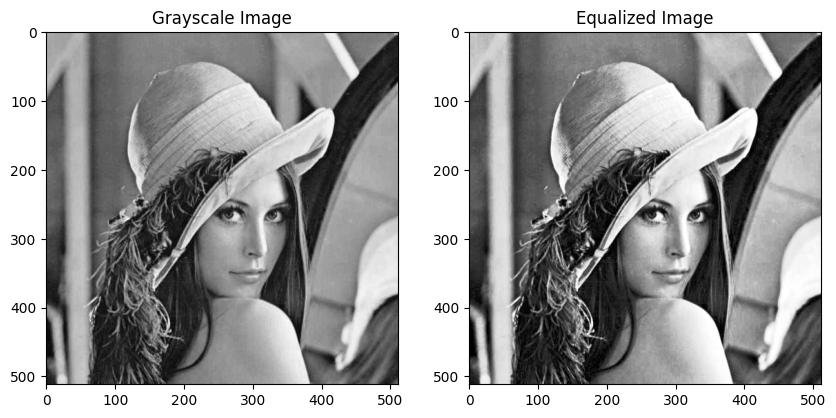

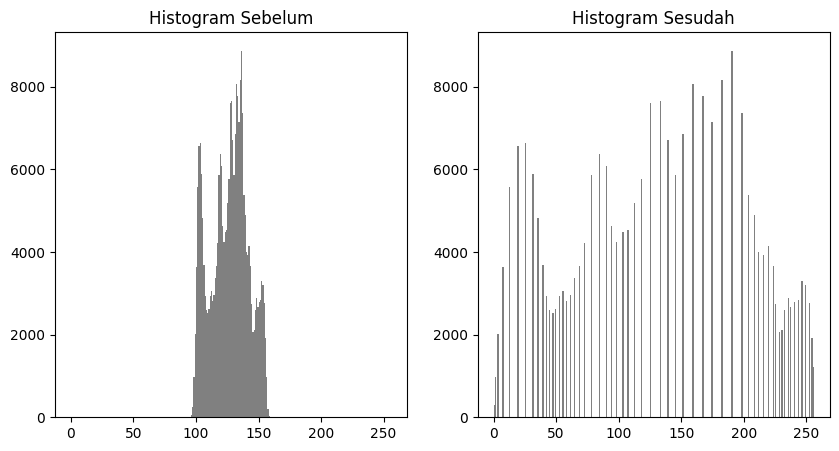

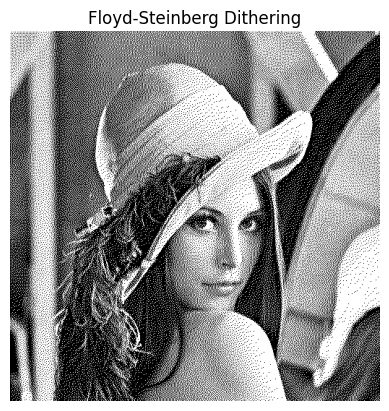

In [18]:
# Membaca gambar
img1 = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/lena_lc.jpg', 0)

# Histogram Equalization
equalized_img = cv.equalizeHist(img1)

# Menampilkan gambar asli dan hasil histogram equalization
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('Grayscale Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')

plt.show()

# Menampilkan histogram sebelum dan sesudah
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.hist(img.ravel(), color='gray', bins=256, range=[0, 256])
plt.title('Histogram Sebelum')

plt.subplot(1, 2, 2)
plt.hist(equalized_img.ravel(),color='gray', bins=256, range=[0, 256])
plt.title('Histogram Sesudah')

plt.show()
def floyd_steinberg_dithering(image):
    # Mengkonversi gambar ke float untuk operasi lebih presisi
    img1 = np.array(image, dtype=float) / 255.0

    # Iterasi piksel pada gambar
    for y in range(img1.shape[0]):
        for x in range(img1.shape[1]):
            old_pixel = img1[y, x]
            new_pixel = np.round(old_pixel)
            img1[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            if x + 1 < img1.shape[1]:
                img1[y, x + 1] += quant_error * 7 / 16
            if y + 1 < img1.shape[0]:
                if x > 0:
                    img1[y + 1, x - 1] += quant_error * 3 / 16
                img1[y + 1, x] += quant_error * 5 / 16
                if x + 1 < img1.shape[1]:
                    img1[y + 1, x + 1] += quant_error * 1 / 16

    # Konversi kembali ke tipe uint8
    dithered_img = (img1 * 255).astype(np.uint8)
    return dithered_img

# Terapkan Floyd-Steinberg dithering
dithered_image = floyd_steinberg_dithering(equalized_img)

# Tampilkan hasil dithering
plt.imshow(dithered_image, cmap='gray')
plt.title('Floyd-Steinberg Dithering')
plt.axis('off')
plt.show()